# Sales Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import os

### (01) Merging 12 months of sales data in to a single file

In [2]:
# all fileNames as a list
files = [file for file in os.listdir("./Sales_Data")]

# empty dataframe
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

### Read the updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales ? How much was earned that month ?

### Data Cleaning

#### Drop NaN

In [4]:
# any => at least a single NaN value in row
all_data = all_data.dropna(how="all")

#### Add Month Column

In [7]:
# remove the warning 
pd.set_option('mode.chained_assignment', None)

# first two characters from the date string
all_data['Order Month'] = all_data['Order Date'].str[0:2]
all_data["Order Month"] = all_data["Order Month"].astype("int32")

#### Find "or" and remove

In [6]:
all_data = all_data.drop( all_data.query(" `Order Month`=='Or' ").index)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Change datatypes to suitable datatypes

In [8]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Order Month           int32
dtype: object

#### Add a sales column

In [9]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Find the month with maximum purchases

In [10]:
results = all_data.groupby("Order Month").sum()
print(results)

             Quantity Ordered  Price Each       Sales
Order Month                                          
1                       10903  1811768.38  1822256.73
2                       13449  2188884.72  2202022.42
3                       17005  2791207.83  2807100.38
4                       20558  3367671.02  3390670.24
5                       18667  3135125.13  3152606.75
6                       15253  2562025.61  2577802.26
7                       16072  2632539.56  2647775.76
8                       13448  2230345.42  2244467.88
9                       13109  2084992.09  2097560.13
10                      22703  3715554.83  3736726.88
11                      19798  3180600.68  3199603.20
12                      28114  4588415.41  4613443.34


#### Plot the graph

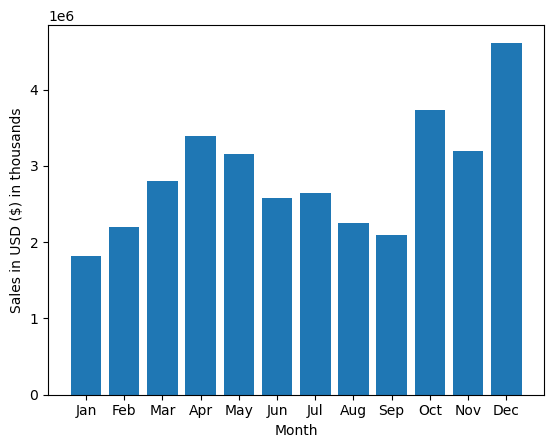

In [11]:
import matplotlib.pyplot as plt
import calendar as cal

months = range(1, 13)
month_names = [cal.month_abbr[m] for m in months]

sales_list = results["Sales"].tolist()

plt.bar(months, sales_list)
plt.xticks(months, month_names)
plt.ylabel("Sales in USD ($) in thousands")
plt.xlabel("Month")

plt.show()


### (02) What City had the highest number of Sales

In [12]:
# str[1] retrieves the second item from the list, which corresponds to the city.
# str.strip() removes any leading or trailing whitespaces from the city name.

def get_city(address):
    return address.split(",")[1]

all_data["Cities"] = all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data = all_data.astype({"Cities" : "string"})
all_data.dtypes

all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [13]:
result_2 = all_data.groupby("Cities").sum()
print(result_2["Sales"])

Cities
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64


#### Plot the Graph

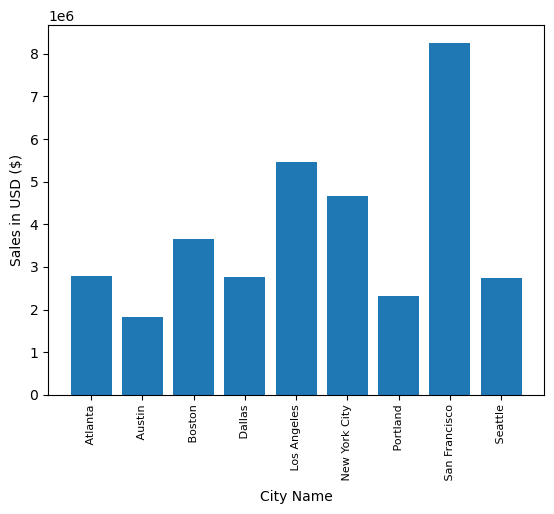

In [14]:
cities = [City for City, df in all_data.groupby("Cities")]

plt.bar(cities, result_2["Sales"])
plt.xticks(rotation="vertical", size=8)  # Rotates the x-axis tick labels for better visibility
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")

plt.show()



### (03) What time should we display advertisements to maximize likelihood of customer's buying products ?

In [15]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [16]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


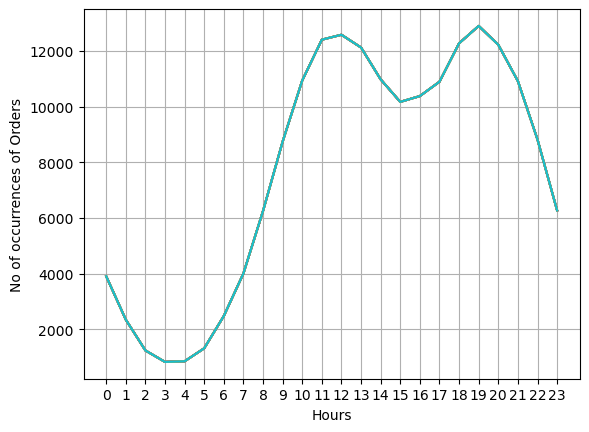

In [18]:
hours = [hour for hour, df in all_data.groupby('Hour')]
no_of_occurrences_orders = all_data.groupby(["Hour"]).count()


plt.plot(hours, no_of_occurrences_orders)
plt.xticks(hours)
plt.ylabel("No of occurrences of Orders")
plt.xlabel("Hours")
plt.grid()
plt.show()

# around 11am (11) or arounf 7pm (19)

### (04) What products are most often sold together ?

In [19]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update((Counter(combinations(row_list, 2))))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### (05) What product sold the most ? Why do you think it sold the most ?

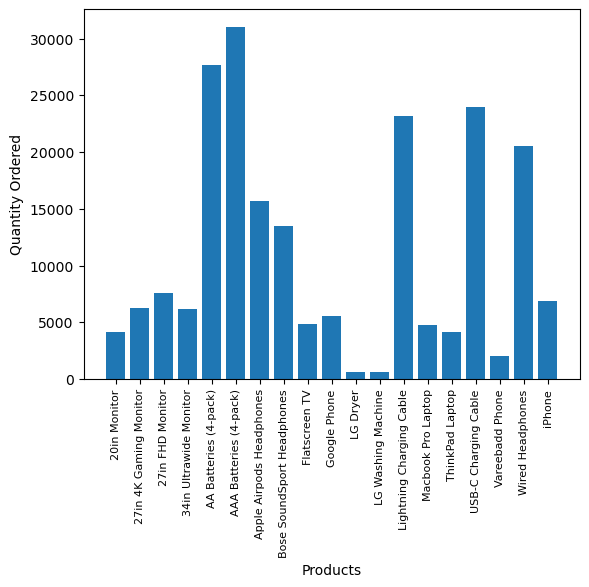

In [21]:
products = all_data.groupby("Product")
quanitity_ordered = products.sum()["Quantity Ordered"]
print(products)
products = [product for product, df in products]

plt.bar(products, quanitity_ordered)
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.show()


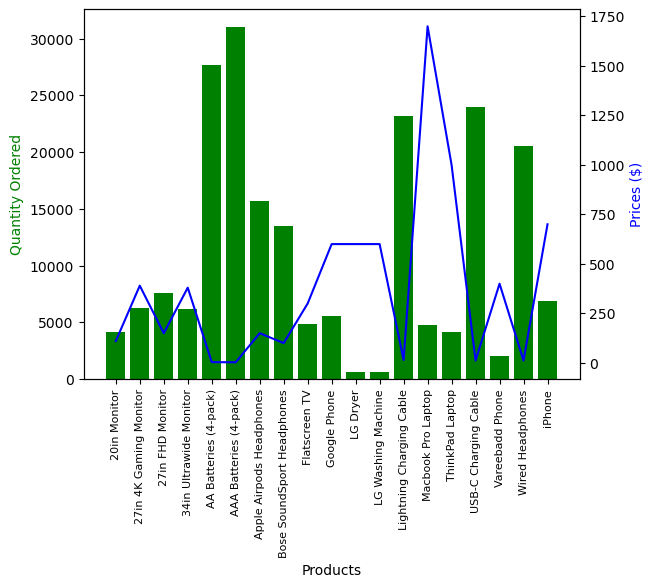

In [22]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quanitity_ordered, color="g")
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()